<a href="https://colab.research.google.com/github/Responze31/Iris-pytorch/blob/main/iris_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [104]:
# create a model class that inherts the module class
class Model(nn.Module):
  def __init__(self, inputf, h1=8, h2=8, output=3):
    super().__init__()
    self.fc1 = nn.Linear(inputf, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [106]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [107]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
140,6.7,3.1,5.6,2.4,2,virginica
141,6.9,3.1,5.1,2.3,2,virginica
142,5.8,2.7,5.1,1.9,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
144,6.7,3.3,5.7,2.5,2,virginica
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   species            150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [109]:
df = df.drop(columns='species')

In [110]:
X = df.drop('target', axis=1)

In [111]:
y = df['target']

In [112]:
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [113]:
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [114]:
y.tail(10)

,target
140,2
141,2
142,2
143,2
144,2
145,2
146,2
147,2
148,2
149,2


In [115]:
X = X.values
y = y.values

In [116]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [117]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [120]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [121]:
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

In [122]:
model = Model(inputf=4)

In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [124]:
model.parameters()

<generator object Module.parameters at 0x7a5dc0225540>

In [125]:
Epoch = 100
Losses = []

for i in range(Epoch):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  Losses.append(loss.item())

  if i%10 == 0:
    print(f'Epoch: {i}, Loss: {loss.item()}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.1434762477874756
Epoch: 10, Loss: 1.0787513256072998
Epoch: 20, Loss: 1.0103719234466553
Epoch: 30, Loss: 0.9039022326469421
Epoch: 40, Loss: 0.8224952816963196
Epoch: 50, Loss: 0.7476062774658203
Epoch: 60, Loss: 0.6368581056594849
Epoch: 70, Loss: 0.5191212892532349
Epoch: 80, Loss: 0.4509735405445099
Epoch: 90, Loss: 0.4217226207256317


Text(0.5, 0, 'epoch')

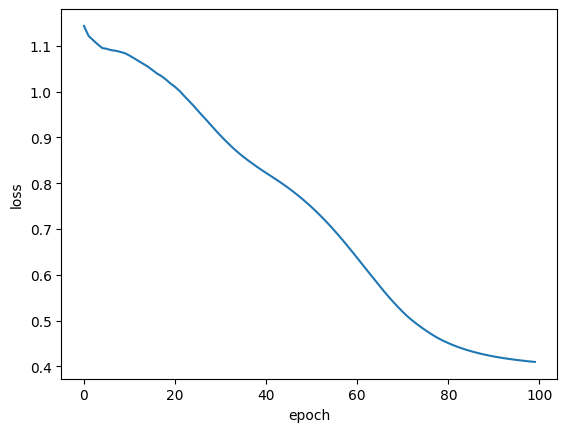

In [126]:
plt.plot(range(Epoch), Losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [127]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    # Get the index of the maximum value in the output tensor
    predicted_class = torch.argmax(y_val)

    # Compare with the actual value from y_test
    if predicted_class == y_test[i]:
      correct += 1

    print(f'{i+1}) ({str(y_val)}) Predicted: {predicted_class.item()}, Actual: {y_test[i].item()}')

print(f'\nWe got {correct} correct!')

1) (tensor([0., 0., 0.])) Predicted: 0, Actual: 0
2) (tensor([0., 0., 0.])) Predicted: 0, Actual: 0
3) (tensor([0., 0., 0.])) Predicted: 0, Actual: 0
4) (tensor([0.0000, 4.2867, 9.0262])) Predicted: 2, Actual: 2
5) (tensor([0.0000, 5.8299, 0.0000])) Predicted: 1, Actual: 1
6) (tensor([0.0000, 5.5019, 0.0000])) Predicted: 1, Actual: 1
7) (tensor([0.0000, 4.9976, 6.6798])) Predicted: 2, Actual: 2
8) (tensor([0.0000, 5.0054, 9.1366])) Predicted: 2, Actual: 2
9) (tensor([0.0000, 6.2995, 0.0000])) Predicted: 1, Actual: 1
10) (tensor([ 0.0000,  4.9295, 10.7619])) Predicted: 2, Actual: 2
11) (tensor([0., 0., 0.])) Predicted: 0, Actual: 0
12) (tensor([0.0000, 4.6364, 9.1506])) Predicted: 2, Actual: 2
13) (tensor([0.0000, 4.8288, 0.0000])) Predicted: 1, Actual: 1
14) (tensor([0.0000, 5.7240, 0.6224])) Predicted: 1, Actual: 1
15) (tensor([0., 0., 0.])) Predicted: 0, Actual: 0
16) (tensor([0.0000, 6.1204, 0.3282])) Predicted: 1, Actual: 1
17) (tensor([0., 0., 0.])) Predicted: 0, Actual: 0
18) (te